In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pymysql
import pyodbc

In [2]:
# Load .env variables
from dotenv import load_dotenv
print(load_dotenv())

True


In [3]:
# Create MySQL connection (AWS RDS)
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASS')}@{os.getenv('MYSQL_HOST')}/{os.getenv('MYSQL_DB')}"
)

# Create MSSQL connection
mssql_engine = create_engine(
    f"mssql+pyodbc://{os.getenv('MSSQL_USER')}:{os.getenv('MSSQL_PASS')}@{os.getenv('MSSQL_HOST')}/{os.getenv('MSSQL_DB')}?driver={os.getenv('MSSQL_DRIVER')}&Encrypt=yes&TrustServerCertificate=no"
)

In [4]:
# Step 1: Read from AWS MySQL
df = pd.read_sql("SELECT * FROM gurgaon_properties_cleaned_v1", con=mysql_engine)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,"pooja room,others",1,South,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",None,"['Feng Shui / Vaastu Compliant', 'Water Storag..."
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,not available,7,NA,Within 3 months,"['Ardee Mall', 'Northern Peripheral Road', 'Mp...",[],"['Power Back-up', 'Feng Shui / Vaastu Complian..."
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,"pooja room,servant room",None,West,5 to 10 Year Old,"['City Square', 'Vatika Town Square', 'Bharat ...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,"servant room,others",5,South-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...","['1 Wardrobe', '4 Fan', '3 Geyser', '7 Light',...","['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,servant room,5,South-East,5 to 10 Year Old,"['Decathlon Sohna Road', 'Raheja Mall', 'Eleme...","['6 Fan', '1 Exhaust Fan', '4 Geyser', '55 Lig...","['Feng Shui / Vaastu Compliant', 'Security / F..."


In [5]:
df.shape   

(3679, 17)

In [6]:
# To show all rows and columns in the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df.head()
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,"pooja room,others",1,South,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",None,"['Feng Shui / Vaastu Compliant', 'Water Storag..."
1,flat,zara aavaas,sector 104,0.65,8519.0,763.0,Carpet area: 763 (70.89 sq.m.),3,2,2,not available,7,NA,Within 3 months,"['Ardee Mall', 'Northern Peripheral Road', 'Mp...",[],"['Power Back-up', 'Feng Shui / Vaastu Complian..."
2,house,DLF New Town Heights 24.0 ★,sector 86,2.47,7718.0,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,"pooja room,servant room",None,West,5 to 10 Year Old,"['City Square', 'Vatika Town Square', 'Bharat ...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3,flat,shree vardhman victoria,sector 70,1.65,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,"servant room,others",5,South-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...","['1 Wardrobe', '4 Fan', '3 Geyser', '7 Light',...","['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,servant room,5,South-East,5 to 10 Year Old,"['Decathlon Sohna Road', 'Raheja Mall', 'Eleme...","['6 Fan', '1 Exhaust Fan', '4 Geyser', '55 Lig...","['Feng Shui / Vaastu Compliant', 'Security / F..."


### 1. areaWithType

In [8]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1637,1.00,1500.0,Built Up area: 1500 (139.35 sq.m.)
290,3.50,1449.0,Plot area 161(134.62 sq.m.)
1218,0.89,477.0,Plot area 477(44.31 sq.m.)
3072,6.30,1800.0,Plot area 200(167.23 sq.m.)
3635,0.55,1100.0,Built Up area: 1100 (102.19 sq.m.)


In [9]:
# to show all column data
pd.set_option('display.max_colwidth', None)

In [10]:
df.sample(5)[['price','area','areaWithType']]


,price,area,areaWithType
2818,0.35,576.0,Super Built up area 576(53.51 sq.m.)Carpet area: 480.53 sq.ft. (44.64 sq.m.)
1079,2.65,1650.0,Carpet area: 1650 (153.29 sq.m.)
9,0.65,70.0,Plot area 70(6.5 sq.m.)
659,3.00,1642.0,Built Up area: 1642 (152.55 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)
2278,15.50,5490.0,Plot area 610(510.04 sq.m.)


### In areaWithType column there are 3 type of area available super_built_up_area, Built Up area and Carpet area we have to extracte into diferent column

In [11]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [13]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [14]:
import re
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [15]:

df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
579,13.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
3678,0.88,flat,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up area: 1668 sq.ft. (154.96 sq.m.)Carpet area: 1501 sq.ft. (139.45 sq.m.),1854.0,1668.0,1501.0
3278,9.25,house,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.)Carpet area: 4500 sq.ft. (418.06 sq.m.),NaN,5000.0,4500.0
1471,1.75,flat,2150.0,Super Built up area 2150(199.74 sq.m.),2150.0,NaN,NaN
2424,1.65,flat,1151.0,Carpet area: 1151 (106.93 sq.m.),NaN,NaN,1151.0


In [16]:
# checking where all the values in super_built_up_area, built_up_area and carpet_area are not null
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(531, 7)

In [17]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
2,2.47,house,3200.0,Plot area 3200(297.29 sq.m.)Built Up area: 2800 sq.ft. (260.13 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),NaN,2800.0,2200.0
6,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,NaN,NaN
9,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,NaN,NaN
10,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN


In [18]:
df.isnull().sum()

property_type             0
society                 486
sector                    0
price                    16
price_per_sqft           16
area                     16
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                    0
agePossession             1
nearbyLocations         168
furnishDetails          946
features                597
super_built_up_area    1802
built_up_area          2534
carpet_area            1805
dtype: int64

In [19]:
# Checking for rows where all area columns are NaN
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [20]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
6,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,NaN,NaN
9,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,NaN,NaN
10,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
12,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [21]:
# saving index of all_nan_df to a variable
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [22]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [23]:
# Extracting plot area for rows and adding it to built_up_area column 
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [24]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,87.0,NaN
6,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,168.0,NaN
9,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,70.0,NaN
10,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.0,NaN
12,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,500.0,NaN


In [25]:
# Function to convert area scale based on the ratio of area to built_up_area into area per square feet
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [26]:
import numpy as np
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [27]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.00,NaN
6,3.25,house,1512.0,Plot area 168(140.47 sq.m.),NaN,1512.00,NaN
9,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,70.00,NaN
10,6.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
12,11.25,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
20,1.95,house,920.0,Plot area 920(85.47 sq.m.),NaN,920.00,NaN
24,15.00,house,4500.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
27,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
30,10.56,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
33,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN


In [28]:
# update the original dataframe
df.update(all_nan_df)

In [29]:
df.isnull().sum()

property_type             0
society                 486
sector                    0
price                    16
price_per_sqft           16
area                     16
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 17
facing                    0
agePossession             1
nearbyLocations         168
furnishDetails          946
features                597
super_built_up_area    1802
built_up_area          1989
carpet_area            1805
dtype: int64

## 2.additionalRoom

In [30]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1513
servant room                                      688
study room                                        244
others                                            219
pooja room                                        164
store room                                         97
study room,servant room                            97
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                55
pooja room,study room,servant room,others          54
pooja room,study room,servant room                 53
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
pooja room,st

In [31]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [32]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
527,not available,0,0,0,0,0
1953,not available,0,0,0,0,0
2745,not available,0,0,0,0,0
3100,"servant room,others",0,1,0,0,1
2092,not available,0,0,0,0,0


## 3.agePossession

In [33]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old        1646
5 to 10 Year Old        563
0 to 1 Year Old         503
undefined               307
10+ Year Old            303
Under Construction       85
Within 6 months          67
Within 3 months          24
2023-12-01 00:00:00      21
By 2023                  17
By 2024                  16
2024-12-01 00:00:00      15
2024-03-01 00:00:00      12
2024-01-01 00:00:00       7
2025-12-01 00:00:00       7
2024-06-01 00:00:00       7
2023-08-01 00:00:00       6
2024-10-01 00:00:00       6
2023-11-01 00:00:00       5
2023-10-01 00:00:00       4
2024-08-01 00:00:00       4
2023-09-01 00:00:00       4
By 2025                   4
2024-11-01 00:00:00       3
2024-05-01 00:00:00       3
2024-02-01 00:00:00       3
2025-01-01 00:00:00       3
2024-07-01 00:00:00       3
2026-01-01 00:00:00       2
2027-06-01 00:00:00       2
2025-03-01 00:00:00       2
By 2027                   2
2025-08-01 00:00:00       2
2025-07-01 00:00:00       2
2026-04-01 00:00:00       2
2025-0

In [34]:
from datetime import datetime

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    
    if "10+ Year Old" in value:
        return "Old Property"
    
    if "Under Construction" in value or "By" in value:
        return "Under Construction"

    try:
        # Try parsing the date
        date = pd.to_datetime(value, errors='coerce')
        if pd.notna(date):
            if date > datetime.now():
                return "Under Construction"
            else:
                return "New Property"
    except:
        pass

    return "Undefined"


In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           706
Moderately Old         563
Undefined              308
Old Property           303
Under Construction     153
Name: count, dtype: int64

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1283,"['5 Wardrobe', '9 Fan', '1 Exhaust Fan', '6 Geyser', '60 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
828,"['6 Wardrobe', '18 Fan', '1 Exhaust Fan', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",None
627,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '1 Stove', '18 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '6 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Curtains', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Park', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
96,None,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3424,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\wasia\AppData\Local\Temp\ipykernel_12300\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [39]:
furnishings_df.shape

(3679, 19)

In [40]:
furnishings_df.sample(1)

,furnishDetails,Curtains,Stove,Water Purifier,Fridge,Sofa,Modular Kitchen,Wardrobe,Fan,Geyser,Light,Washing Machine,Chimney,Dining Table,Bed,Exhaust Fan,Microwave,AC,TV
2726,"['8 Fan', '8 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,1,0,8,0,8,0,1,0,0,0,0,0,0


In [41]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\wasia\AppData\Local\Temp\ipykernel_12300\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [42]:
furnishings_df.sample(5)

,Curtains,Stove,Water Purifier,Fridge,Sofa,Modular Kitchen,Wardrobe,Fan,Geyser,Light,Washing Machine,Chimney,Dining Table,Bed,Exhaust Fan,Microwave,AC,TV
234,0,1,0,1,0,1,3,0,1,8,0,0,1,2,0,0,0,0
1104,0,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0
1590,0,1,1,0,0,1,0,0,5,0,0,1,0,0,1,0,5,0
618,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0
1312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### use KMeans cluster to group the data into different clusters like furnished, semi furnished, unfurnished

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [47]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

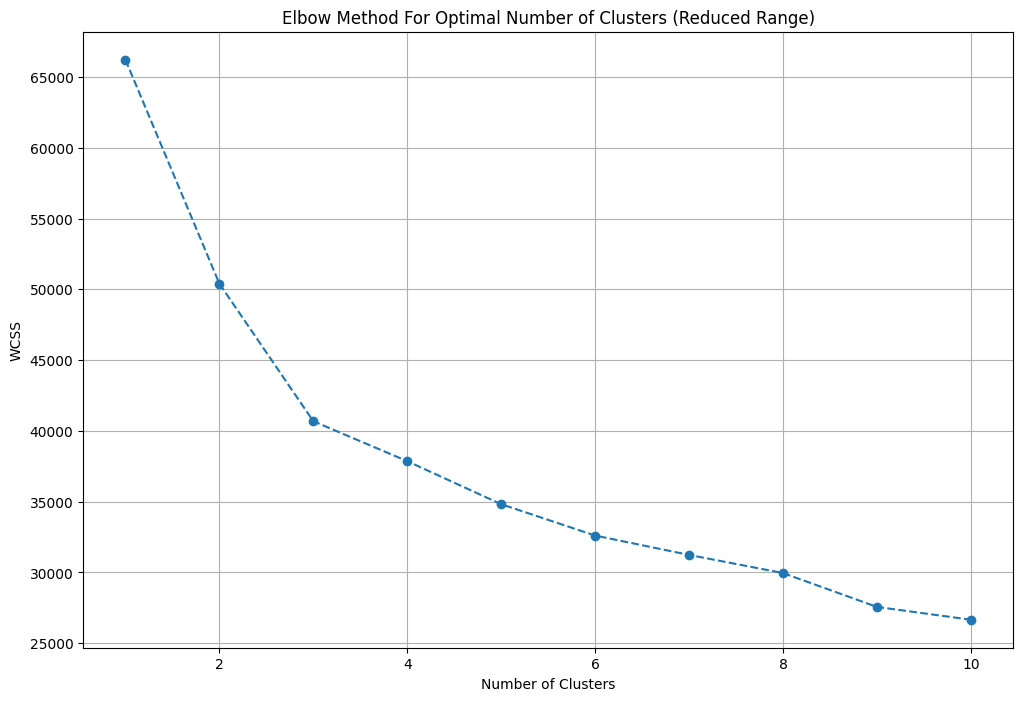

In [48]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [49]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [50]:
cluster_assignments.shape

(3679,)

In [51]:
df.shape

(3679, 43)

In [52]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Curtains,Stove,Water Purifier,Fridge,Sofa,Modular Kitchen,Wardrobe,Fan,Geyser,Light,Washing Machine,Chimney,Dining Table,Bed,Exhaust Fan,Microwave,AC,TV
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,"pooja room,others",1,South,Moderately Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Kr Dental Hub', 'Dr. Mittal Clinic', 'Jiya Clinic', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'R K Hospital Gurgaon', 'Dr. Ashok Jain', 'Chirag Hospital Pvt. Ltd', 'Pearl Dental Clinic', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Taneja Hospital', 'Sparsh Hospital Gurgaon', 'Esic Hospital Gurugram', 'Geeta Nursing Home Gurgaon', 'GH Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Chiranjiv Hospital', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Dr. Madan Clinic', 'Jackson Hospital', 'M.S Hospital', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",None,"['Feng Shui / Vaastu Compliant', 'Water Storage', 'Visitor Parking']",NaN,783.0,NaN,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# removing the last 18 columns from df because we are converting then into funishings types
df = df.iloc[:,:-18]

In [54]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,"pooja room,others",1,South,Moderately Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Kr Dental Hub', 'Dr. Mittal Clinic', 'Jiya Clinic', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'R K Hospital Gurgaon', 'Dr. Ashok Jain', 'Chirag Hospital Pvt. Ltd', 'Pearl Dental Clinic', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Taneja Hospital', 'Sparsh Hospital Gurgaon', 'Esic Hospital Gurugram', 'Geeta Nursing Home Gurgaon', 'GH Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Chiranjiv Hospital', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Dr. Madan Clinic', 'Jackson Hospital', 'M.S Hospital', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",None,"['Feng Shui / Vaastu Compliant', 'Water Storage', 'Visitor Parking']",NaN,783.0,NaN,0,0,0,1,1


In [55]:
# adding the cluster assignments to the original dataframe with column name 'furnishing_type'
df['furnishing_type'] = cluster_assignments

In [56]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1768,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2870,None,0
3499,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1659,"['1 Exhaust Fan', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2747,None,0


## 5.features

In [58]:
df[['society','features']].sample(5)

,society,features
2402,shapoorji pallonji joyville gurugram,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3392,jammu and kashmir bank employees cghs,"['Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']"
1511,m3m skycity,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
531,signature global grand iva,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Shopping Centre']"
110,None,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal']"


In [59]:
df['features'].isnull().sum()

np.int64(597)

In [62]:
# loading appartments data from MySQL
app_df = pd.read_sql("SELECT * FROM appartments", con=mysql_engine)
app_df.shape

(247, 7)

In [ ]:
# Convert 'PropertyName' to lowercase
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [64]:
app_df.head(1)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,smartworld one dxp,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"


In [ ]:
# saving the temp_df where features are null
temp_df = df[df['features'].isnull()]

In [66]:
temp_df.shape

(597, 26)

In [68]:
temp_df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
11,flat,dnha cghs,sector 1,0.85,3864.0,2200.0,Built Up area: 2200 (204.39 sq.m.),3,3,0,not available,5,NA,Undefined,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Pind Baluchi', 'Moti Mahal', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Chiranjiv Bharati School', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']",None,None,NaN,2200.0,NaN,0,0,0,0,0,0


In [ ]:
# merging temp_df with app_df to get the TopFacilities from app_df into temp_df missing features
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [70]:
x.shape

(597,)

In [71]:
temp_df.shape

(597, 26)

In [72]:
# updating the features column in temp_df with the TopFacilities from app_df
df.loc[temp_df.index,'features'] = x.values

In [73]:
df['features'].isnull().sum()

np.int64(470)

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [75]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [76]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1774,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
853,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [81]:
features_binary_df.shape

(3679, 128)

In [80]:
for i in features_binary_df.columns:
    print(i)

24/7 Power Backup
24/7 Water Supply
24x7 Security
ATM
Aerobics Centre
Air Hockey
Airy Rooms
Amphitheatre
Automated Car Wash
Badminton Court
Bank Attached Property
Banquet Hall
Bar/Chill-Out Lounge
Barbecue
Basketball Court
Beach Volley Ball Court
Billiards
Bowling Alley
Bus Shelter
Business Lounge
CCTV Camera Security
Cafeteria
Car Parking
Car wash area
Card Room
Centrally Air Conditioned
Changing Area
Children's Play Area
Cigar Lounge
Clinic
Club House
Club house / Community Center
Community Hall
Concierge Service
Conference room
Creche/Day care
Cricket Pitch
Doctor on Call
Earthquake Resistant
Entrance Lobby
False Ceiling Lighting
Feng Shui / Vaastu Compliant
Fitness Centre / GYM
Flower Garden
Food Court
Foosball
Football
Fountain
Gated Community
Gazebo
Golf Course
Grocery Shop
Gymnasium
High Ceiling Height
High Speed Elevators
Infinity Pool
Intercom Facility
Internet/wi-fi connectivity
Jacuzzi
Jogging Track
Landscape Garden
Laundry
Lawn Tennis Court
Library
Lift(s)
Lounge
Low Densit

In [86]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution used chatgpt to ask for weights
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7, 
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
    }
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [88]:
df['luxury_score'] = luxury_score

In [89]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,None,sector 4,0.67,8557.0,783.0,Plot area 87(72.74 sq.m.),3,2,1,"pooja room,others",1,South,Moderately Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Kr Dental Hub', 'Dr. Mittal Clinic', 'Jiya Clinic', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'R K Hospital Gurgaon', 'Dr. Ashok Jain', 'Chirag Hospital Pvt. Ltd', 'Pearl Dental Clinic', 'Aryan Hospital', 'D.R. Rajnis Gupta Clinic', 'Taneja Hospital', 'Sparsh Hospital Gurgaon', 'Esic Hospital Gurugram', 'Geeta Nursing Home Gurgaon', 'GH Gurgaon', 'Dr. Agya Ram Sharma Clinic', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Chiranjiv Hospital', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Dr. Madan Clinic', 'Jackson Hospital', 'M.S Hospital', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",None,"['Feng Shui / Vaastu Compliant', 'Water Storage', 'Visitor Parking']",NaN,783.0,NaN,0,0,0,1,1,0,"[Feng Shui / Vaastu Compliant, Water Storage, Visitor Parking]",19


In [90]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [91]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2949,flat,dlf the skycourt,sector 86,1.55,8035.0,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,12,North-East,Relatively New,1929.0,1500.0,1300.000000,0,0,0,0,1,1,166
889,flat,green court,sector 90,0.50,8333.0,600.0,Super Built up area 700(65.03 sq.m.)Carpet area: 600 sq.ft. (55.74 sq.m.),2,2,1,8,NA,New Property,700.0,NaN,600.000000,0,0,0,0,0,0,42
875,flat,dlf regal gardens,sector 90,1.78,8036.0,2215.0,Super Built up area 2215(205.78 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),4,4,3+,8,South,Relatively New,2215.0,2000.0,1650.000000,0,0,0,0,0,0,126
1143,flat,breez global hill view,sohna road,0.30,5124.0,585.0,Carpet area: 585.41 (54.39 sq.m.),2,2,1,11,North,New Property,NaN,NaN,585.448521,0,0,0,0,0,0,91
3538,flat,pareena coban residences,sector 99a,1.08,6625.0,1630.0,Super Built up area 1997(185.53 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1630 sq.ft. (151.43 sq.m.),3,5,3,2,West,Relatively New,1997.0,1750.0,1630.000000,0,1,0,0,1,0,49


In [92]:
df.shape

(3679, 23)

In [95]:
# Save the final DataFrame to MySQL
df.to_sql('gurgaon_properties_cleaned_v2', con=mysql_engine, if_exists='replace', index=False)

3679

In [96]:
# Save the final DataFrame to MsSQL
df.to_sql('gurgaon_properties_cleaned_v2', con=mssql_engine, if_exists='replace', index=False)

39